In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
# import all lagged data
df_lagged_added_stats_sa199m2e = pd.read_csv('sa199m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m2e = pd.read_csv('sa196m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m1e = pd.read_csv('sa196m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa198m2e = pd.read_csv('sa198m2e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa196m3e = pd.read_csv('sa196m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m3e = pd.read_csv('sa199m3e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa199m1e = pd.read_csv('sa199m1e_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m1 = pd.read_csv('sa78m1_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m3 = pd.read_csv('sa78m3_new_newest_lagged_added_stats.csv')
df_lagged_added_stats_sa78m5 = pd.read_csv('sa78m5_new_newest_lagged_added_stats.csv')

In [605]:
grouped_lagged_added_stats = pd.concat([df_lagged_added_stats_sa199m2e,df_lagged_added_stats_sa196m2e,
df_lagged_added_stats_sa196m1e,df_lagged_added_stats_sa198m2e,df_lagged_added_stats_sa196m3e,df_lagged_added_stats_sa199m3e,
df_lagged_added_stats_sa199m1e,df_lagged_added_stats_sa78m1,df_lagged_added_stats_sa78m3,df_lagged_added_stats_sa78m5]).iloc[:,1:]

In [606]:
grouped_lagged_added_stats_ri = grouped_lagged_added_stats.reset_index(drop=True)

# 2s vs 3s vs 4s

In [814]:
grouped_lagged_added_stats_ri_2 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==2]

In [815]:
grouped_lagged_added_stats_ri_2['Binary']=0

In [816]:
grouped_lagged_added_stats_ri_3 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==3]

In [817]:
grouped_lagged_added_stats_ri_3['Binary']=1

In [818]:
grouped_lagged_added_stats_ri_4 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==4]

In [819]:
grouped_lagged_added_stats_ri_4['Binary']=2

In [820]:
grouped_lagged_binary2v3v4 = pd.concat([grouped_lagged_added_stats_ri_2, grouped_lagged_added_stats_ri_3, grouped_lagged_added_stats_ri_4])

In [821]:
grouped_lagged_binary2v3v4_ri = grouped_lagged_binary2v3v4.reset_index(drop=True)

In [822]:
x_main_2v3v4= grouped_lagged_binary2v3v4_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        
        'lagged_4_mid_duration', 
       'lagged_4_mid_nose_mov', 'lagged_4_mid_nose_vel', 
       'lagged_4_mid_tail_mov', 'lagged_4_mid_tail_vel', 'lagged_4_mid_tortuosity',                                              
         'lagged_4_current_coeff', 
        'lagged_4_new_current_coeff',                                       
        'lagged_4_current_coeff_time_prop',                                         
         
       'lagged_4_new_current_coeff_time_prop',                                            
       
       'lagged_4_entry_lat', 'lagged_4_entry_lat_nose_mov',
       'lagged_4_entry_lat_nose_vel', 'lagged_4_entry_lat_tail_mov',
       'lagged_4_entry_lat_tail_vel', 'lagged_4_duration',
       'lagged_4_nose_max_distance', 'lagged_4_nose_time_to_max_dist',
       'lagged_4_tail_max_distance', 'lagged_4_tail_time_to_max_dist',                                         
       'lagged_4_arm_nose_mov', 'lagged_4_arm_nose_vel',                                                 
        'lagged_4_arm_tail_mov', 'lagged_4_arm_tail_vel',
       'lagged_4_entry_tortuosity', 'lagged_4_exit_tortuosity',
       'lagged_4_other_tortuosity', 'lagged_4_exit_lat',
       'lagged_4_exit_lat_nose_mov', 'lagged_4_exit_lat_nose_vel',
       'lagged_4_exit_lat_tail_mov', 'lagged_4_exit_lat_tail_vel',
       'lagged_4_exitmid_duration', 'lagged_4_midentry_duration',
       'lagged_4_exitmidentry_duration',                                                                                   


                                                            
        
        'Lagged 4 Cur Coeff', 
        'New Lagged 4 Cur Coeff',                                          
                                               
         'Lagged 4 Cur Coeff Time Proportional',
          'New Lagged 4 Cur Coeff Time Proportional',                                            
          'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional',                                            
       'Lagged 3 Cur Coeff','New Lagged 3 Cur Coeff','Lagged 3 Cur Coeff Time Proportional', 'New Lagged 3 Cur Coeff Time Proportional',                                                
          'Lagged 1 Cur Coeff','New Lagged 1 Cur Coeff','Lagged 1 Cur Coeff Time Proportional', 'New Lagged 1 Cur Coeff Time Proportional'                                                ])


# 'Lagged 3 Cur Coeff','New Lagged 3 Cur Coeff','Lagged 3 Cur Coeff Time Proportional', 'New Lagged 3 Cur Coeff Time Proportional',


In [823]:
x_main_2v3v4.columns[100:]

Index(['lagged_2_exit_lat_nose_mov', 'lagged_3_exit_lat_nose_mov',
       'lagged_1_exit_lat_nose_vel', 'lagged_2_exit_lat_nose_vel',
       'lagged_3_exit_lat_nose_vel', 'lagged_1_exit_lat_tail_mov',
       'lagged_2_exit_lat_tail_mov', 'lagged_3_exit_lat_tail_mov',
       'lagged_1_exit_lat_tail_vel', 'lagged_2_exit_lat_tail_vel',
       'lagged_3_exit_lat_tail_vel', 'ExitMid Duration',
       'lagged_1_exitmid_duration', 'lagged_2_exitmid_duration',
       'lagged_3_exitmid_duration', 'MidEntry Duration',
       'lagged_1_midentry_duration', 'lagged_2_midentry_duration',
       'lagged_3_midentry_duration', 'ExitMidEntry Duration',
       'lagged_1_exitmidentry_duration', 'lagged_2_exitmidentry_duration',
       'lagged_3_exitmidentry_duration'],
      dtype='object')

In [824]:
x_2v3v4 = x_main_2v3v4.values

In [825]:
y_2v3v4 = grouped_lagged_binary2v3v4_ri['Binary'].values

In [826]:
y_2v3v4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int64)

In [827]:
X_train_2v3v4, X_test_2v3v4, y_train_2v3v4, y_test_2v3v4 = train_test_split(x_2v3v4, y_2v3v4, test_size=0.2, stratify = y_2v3v4, random_state=3)

In [828]:
mod_2v3v4 =  GradientBoostingClassifier(n_estimators=10000, learning_rate = 0.05, validation_fraction=0.1, n_iter_no_change=1000, max_depth = None, random_state=59)
mod_2v3v4.fit(X_train_2v3v4, y_train_2v3v4)
y_pred_2v3v4=mod_2v3v4.predict(X_test_2v3v4)

In [829]:
mod_2v3v4.n_estimators_

1001

In [830]:
target_names = ['2', '3', '4']

In [831]:
f1_sc_2v3v4 = f1_score(y_test_2v3v4, y_pred_2v3v4, average = 'weighted')
f1_sc_2v3v4

0.4233918128654971

In [832]:
p_sc_2v3v4 = precision_score(y_test_2v3v4, y_pred_2v3v4, average = 'weighted')
p_sc_2v3v4

0.4320987654320988

In [833]:
cf_matrix_2v3v4 = confusion_matrix(y_test_2v3v4, y_pred_2v3v4)
cf_matrix_2v3v4

array([[ 2,  3,  7],
       [ 5,  8,  9],
       [ 1,  5, 14]], dtype=int64)

In [834]:
print(classification_report(y_test_2v3v4, y_pred_2v3v4, target_names=target_names))

              precision    recall  f1-score   support

           2       0.25      0.17      0.20        12
           3       0.50      0.36      0.42        22
           4       0.47      0.70      0.56        20

    accuracy                           0.44        54
   macro avg       0.41      0.41      0.39        54
weighted avg       0.43      0.44      0.42        54



In [835]:
y_score_2v3v4 = mod_2v3v4.predict_proba(X_test_2v3v4)


In [836]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train_2v3v4)
y_onehot_test = label_binarizer.transform(y_test_2v3v4)
y_onehot_test.shape  # (n_samples, n_classes)

(54, 3)

In [837]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

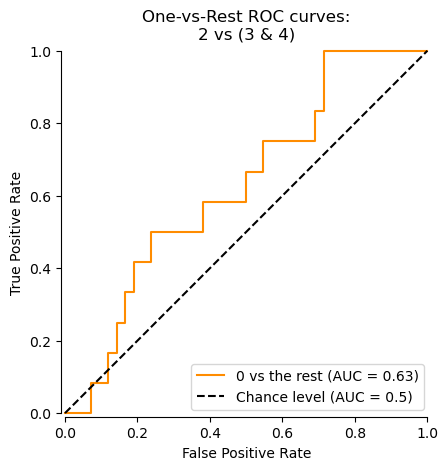

In [838]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_2v3v4[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n2 vs (3 & 4)",
)

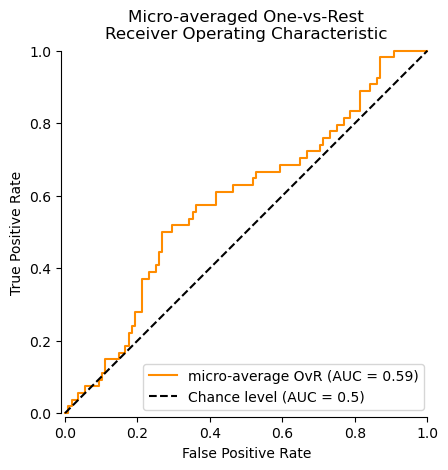

In [839]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score_2v3v4.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


In [840]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test_2v3v4,
    y_score_2v3v4,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.59


In [841]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_2v3v4.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.59


In [842]:
n_classes = 3

In [843]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_2v3v4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.59


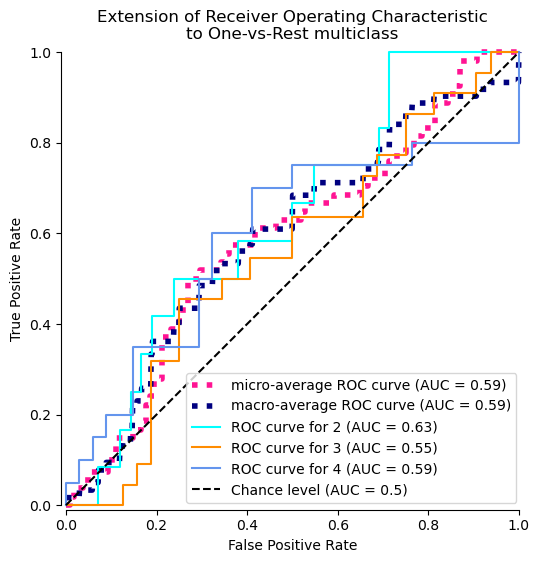

In [844]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_2v3v4[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
        despine=True,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)


In [845]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_2v3v4), 2))
print(pair_list)

[(0, 1), (0, 2), (1, 2)]


Macro-averaged One-vs-One ROC AUC score:
0.59


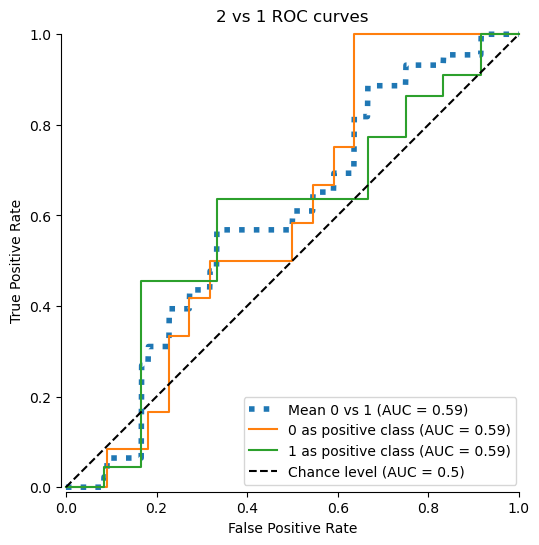

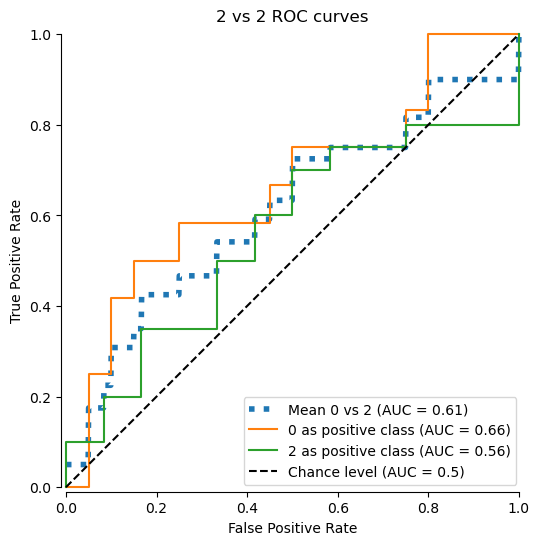

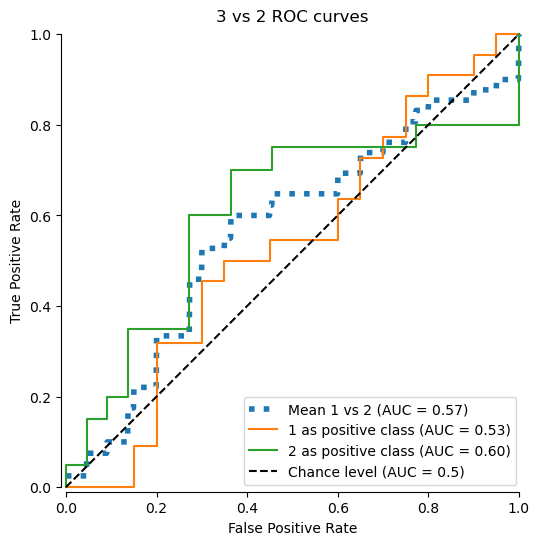

In [846]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test_2v3v4 == label_a
    b_mask = y_test_2v3v4 == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score_2v3v4[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score_2v3v4[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score_2v3v4[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score_2v3v4[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
        despine=True,
    )
    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{target_names[idx_a]} vs {label_b} ROC curves",
    )

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [517]:
macro_roc_auc_ovo = roc_auc_score(
    y_test_2v3v4,
    y_score_2v3v4,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.59


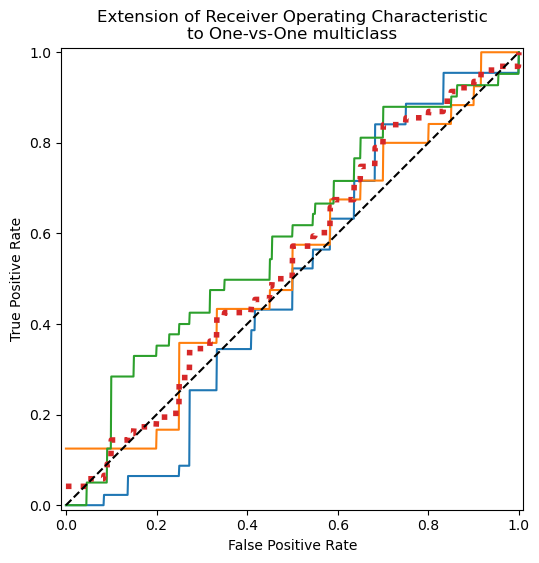

In [370]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    ax.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

ax.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-One multiclass",
    aspect="equal",
    xlim=(-0.01, 1.01),
    ylim=(-0.01, 1.01),
)

In [371]:
X_train_2v3v4.shape

(214, 123)

In [372]:
from sklearn.linear_model import LogisticRegression

In [492]:
logr_2v3v4 =  LogisticRegression(random_state=5, class_weight='balanced', max_iter=10000, solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.1)
logr_2v3v4.fit(X_train_2v3v4, y_train_2v3v4)
y_pred_logr_2v3v4=logr_2v3v4.predict(X_test_2v3v4)

In [493]:
y_pred_logr_2v3v4

array([3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 4, 2, 2, 4, 3, 2, 2, 3,
       4, 3, 3, 4, 4, 3, 3, 2, 3, 4, 4, 3, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 2, 3, 2, 2], dtype=int64)

In [494]:
target_names = ['2', '3', '4']

In [495]:
f1_sc_logr_2v3v4 = f1_score(y_test_2v3v4, y_pred_logr_2v3v4, average = 'weighted')
f1_sc_logr_2v3v4

0.37759475092808426

In [496]:
p_sc_logr_2v3v4 = precision_score(y_test_2v3v4, y_pred_logr_2v3v4, average = 'weighted')
p_sc_logr_2v3v4

0.3733869616222557

In [497]:
cf_matrix_logr_2v3v4 = confusion_matrix(y_test_2v3v4, y_pred_logr_2v3v4)
cf_matrix_logr_2v3v4

array([[ 4,  6,  2],
       [ 7,  5, 10],
       [ 2,  6, 12]], dtype=int64)

In [454]:
print(classification_report(y_test_2v3v4, y_pred_logr_2v3v4, target_names=target_names))

              precision    recall  f1-score   support

           2       0.29      0.33      0.31        12
           3       0.33      0.27      0.30        22
           4       0.50      0.55      0.52        20

    accuracy                           0.39        54
   macro avg       0.37      0.39      0.38        54
weighted avg       0.38      0.39      0.38        54



In [786]:
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss

In [787]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.frozen import FrozenEstimator

In [788]:
X_t_2v3v4, X_test_2v3v4, y_t_2v3v4, y_test_2v3v4 = train_test_split(x_2v3v4, y_2v3v4, test_size=0.2, stratify = y_2v3v4, random_state=3)

In [789]:
X_train_2v3v4, X_cal_2v3v4, y_train_2v3v4, y_cal_2v3v4 = train_test_split(X_t_2v3v4, y_t_2v3v4, test_size=0.5, stratify = y_t_2v3v4, random_state=3)

In [790]:
mod_2v3v4 =  GradientBoostingClassifier(n_estimators=10000, learning_rate = 0.025, validation_fraction=0.1, n_iter_no_change=500, random_state=59)
mod_2v3v4.fit(X_train_2v3v4, y_train_2v3v4)
y_pred_2v3v4=mod_2v3v4.predict(X_test_2v3v4)

In [791]:
mod_2v3v4.n_estimators_

501

In [792]:
target_names = ['0', '1', '2']

In [793]:
f1_sc_2v3v4 = f1_score(y_test_2v3v4, y_pred_2v3v4, average = 'weighted')
f1_sc_2v3v4

0.33089779121525154

In [794]:
p_sc_2v3v4 = precision_score(y_test_2v3v4, y_pred_2v3v4, average = 'weighted')
p_sc_2v3v4

0.29903978052126196

In [795]:
cf_matrix_2v3v4 = confusion_matrix(y_test_2v3v4, y_pred_2v3v4)
cf_matrix_2v3v4

array([[ 0,  8,  4],
       [ 1, 10, 11],
       [ 1,  9, 10]], dtype=int64)

In [796]:
print(classification_report(y_test_2v3v4, y_pred_2v3v4, target_names=target_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.37      0.45      0.41        22
           2       0.40      0.50      0.44        20

    accuracy                           0.37        54
   macro avg       0.26      0.32      0.28        54
weighted avg       0.30      0.37      0.33        54



In [797]:
cal_mod_2v3v4 = CalibratedClassifierCV(FrozenEstimator(mod_2v3v4), method = 'sigmoid')

In [798]:
cal_mod_2v3v4.fit(X_cal_2v3v4,y_cal_2v3v4)

CalibratedClassifierCV(estimator=FrozenEstimator(estimator=GradientBoostingClassifier(learning_rate=0.025,
                                                                                      n_estimators=10000,
                                                                                      n_iter_no_change=500,
                                                                                      random_state=59)))

In [799]:
y_test_2v3v4

array([0, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 1, 1, 1,
       0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 0, 1, 1], dtype=int64)

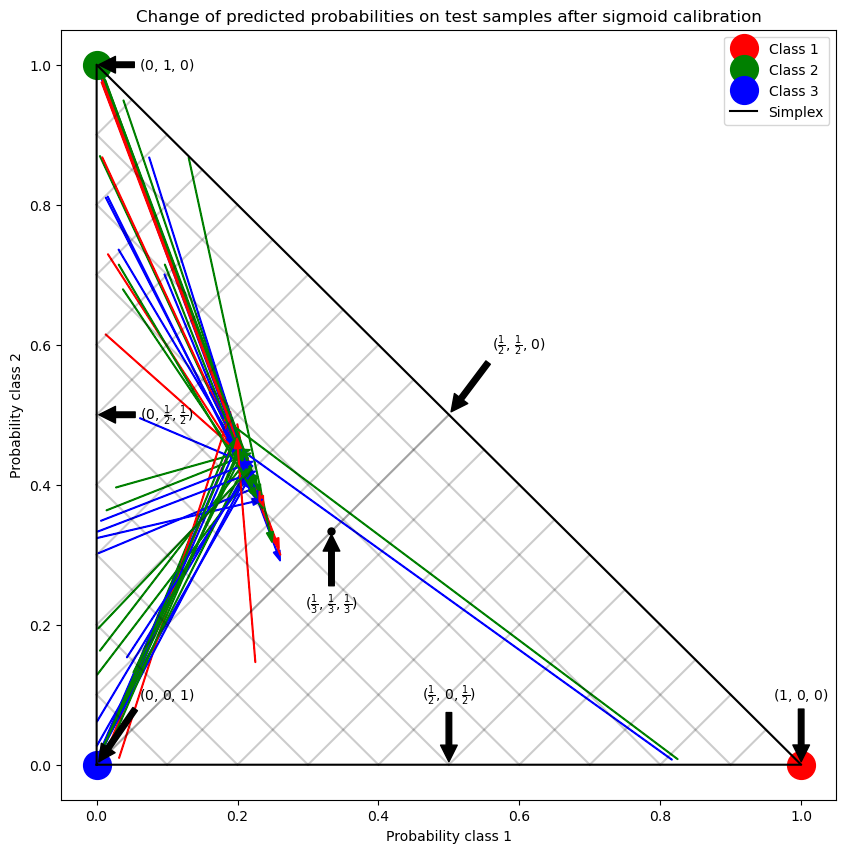

In [800]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
colors = ["r", "g", "b"]

mod_2v3v4_probs = mod_2v3v4.predict_proba(X_test_2v3v4)
cal_mod_2v3v4_probs = cal_mod_2v3v4.predict_proba(X_test_2v3v4)
# Plot arrows
for i in range(mod_2v3v4_probs.shape[0]):
    plt.arrow(
        mod_2v3v4_probs[i, 0],
        mod_2v3v4_probs[i, 1],
        cal_mod_2v3v4_probs[i, 0] - mod_2v3v4_probs[i, 0],
        cal_mod_2v3v4_probs[i, 1] - mod_2v3v4_probs[i, 1],
        color=colors[y_test_2v3v4[i]],
        head_width=1e-2,
    )

# Plot perfect predictions, at each vertex
plt.plot([1.0], [0.0], "ro", ms=20, label="Class 1")
plt.plot([0.0], [1.0], "go", ms=20, label="Class 2")
plt.plot([0.0], [0.0], "bo", ms=20, label="Class 3")

# Plot boundaries of unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], "k", label="Simplex")

# Annotate points 6 points around the simplex, and mid point inside simplex
plt.annotate(
    r"($\frac{1}{3}$, $\frac{1}{3}$, $\frac{1}{3}$)",
    xy=(1.0 / 3, 1.0 / 3),
    xytext=(1.0 / 3, 0.23),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.plot([1.0 / 3], [1.0 / 3], "ko", ms=5)
plt.annotate(
    r"($\frac{1}{2}$, $0$, $\frac{1}{2}$)",
    xy=(0.5, 0.0),
    xytext=(0.5, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $\frac{1}{2}$, $\frac{1}{2}$)",
    xy=(0.0, 0.5),
    xytext=(0.1, 0.5),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($\frac{1}{2}$, $\frac{1}{2}$, $0$)",
    xy=(0.5, 0.5),
    xytext=(0.6, 0.6),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $0$, $1$)",
    xy=(0, 0),
    xytext=(0.1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($1$, $0$, $0$)",
    xy=(1, 0),
    xytext=(1, 0.1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
plt.annotate(
    r"($0$, $1$, $0$)",
    xy=(0, 1),
    xytext=(0.1, 1),
    xycoords="data",
    arrowprops=dict(facecolor="black", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)
# Add grid
plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], "k", alpha=0.2)
    plt.plot([0, 0 + (1 - x) / 2], [x, x + (1 - x) / 2], "k", alpha=0.2)
    plt.plot([x, x + (1 - x) / 2], [0, 0 + (1 - x) / 2], "k", alpha=0.2)

plt.title("Change of predicted probabilities on test samples after sigmoid calibration")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
_ = plt.legend(loc="best")

In [801]:
from sklearn.metrics import log_loss

score = log_loss(y_test_2v3v4, mod_2v3v4_probs)
cal_score = log_loss(y_test_2v3v4, cal_mod_2v3v4_probs)

print("Log-loss of")
print(f" * uncalibrated classifier: {score:.3f}")
print(f" * calibrated classifier: {cal_score:.3f}")

Log-loss of
 * uncalibrated classifier: 2.167
 * calibrated classifier: 1.063


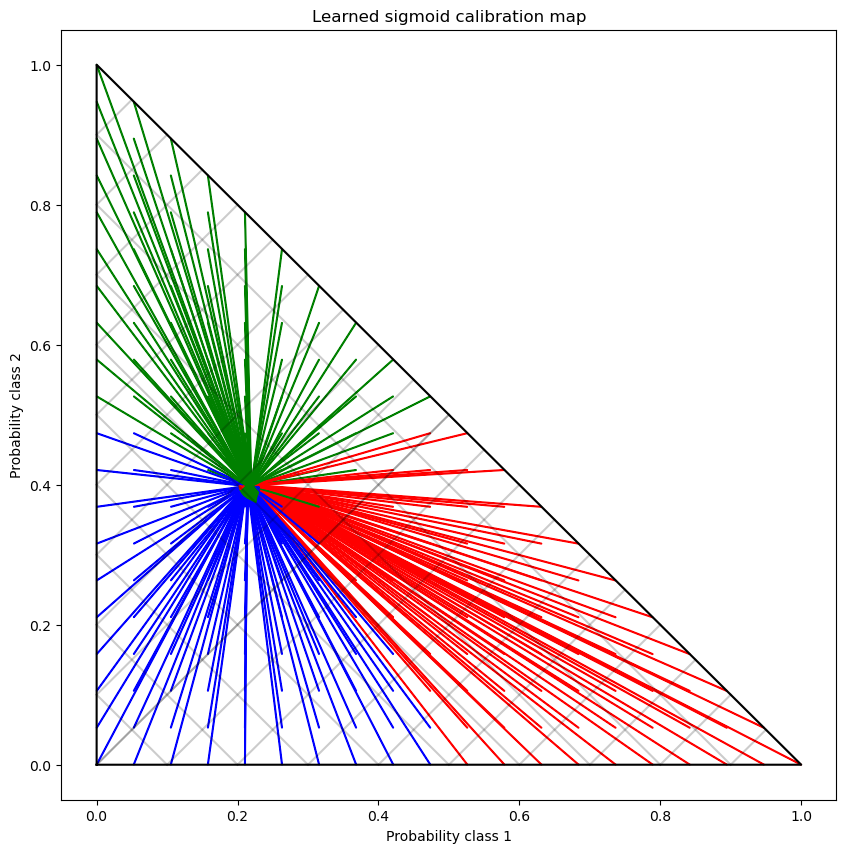

In [802]:
plt.figure(figsize=(10, 10))
# Generate grid of probability values
p1d = np.linspace(0, 1, 20)
p0, p1 = np.meshgrid(p1d, p1d)
p2 = 1 - p0 - p1
p = np.c_[p0.ravel(), p1.ravel(), p2.ravel()]
p = p[p[:, 2] >= 0]

# Use the three class-wise calibrators to compute calibrated probabilities
calibrated_classifier = cal_mod_2v3v4.calibrated_classifiers_[0]
prediction = np.vstack(
    [
        calibrator.predict(this_p)
        for calibrator, this_p in zip(calibrated_classifier.calibrators, p.T)
    ]
).T

# Re-normalize the calibrated predictions to make sure they stay inside the
# simplex. This same renormalization step is performed internally by the
# predict method of CalibratedClassifierCV on multiclass problems.
prediction /= prediction.sum(axis=1)[:, None]

# Plot changes in predicted probabilities induced by the calibrators
for i in range(prediction.shape[0]):
    plt.arrow(
        p[i, 0],
        p[i, 1],
        prediction[i, 0] - p[i, 0],
        prediction[i, 1] - p[i, 1],
        head_width=1e-2,
        color=colors[np.argmax(p[i])],
    )

# Plot the boundaries of the unit simplex
plt.plot([0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], "k", label="Simplex")

plt.grid(False)
for x in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    plt.plot([0, x], [x, 0], "k", alpha=0.2)
    plt.plot([0, 0 + (1 - x) / 2], [x, x + (1 - x) / 2], "k", alpha=0.2)
    plt.plot([x, x + (1 - x) / 2], [0, 0 + (1 - x) / 2], "k", alpha=0.2)

plt.title("Learned sigmoid calibration map")
plt.xlabel("Probability class 1")
plt.ylabel("Probability class 2")
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.show()


In [803]:
y_pred_cal_2v3v4

array([1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [804]:
y_pred_cal_2v3v4=cal_mod_2v3v4.predict(X_test_2v3v4)

In [805]:
cal_mod_2v3v4.n_estimators_

AttributeError: 'CalibratedClassifierCV' object has no attribute 'n_estimators_'

In [ ]:
target_names = ['0', '1', '2']

In [ ]:
f1_sc_2v3v4 = f1_score(y_test_2v3v4, y_pred_cal_2v3v4, average = 'weighted')
f1_sc_2v3v4

In [ ]:
p_sc_2v3v4 = precision_score(y_test_2v3v4, y_pred_cal_2v3v4, average = 'weighted')
p_sc_2v3v4

In [ ]:
cf_matrix_2v3v4 = confusion_matrix(y_test_2v3v4, y_pred_cal_2v3v4)
cf_matrix_2v3v4

In [ ]:
print(classification_report(y_test_2v3v4, y_pred_cal_2v3v4, target_names=target_names))

In [ ]:
y_score_2v3v4 = cal_mod_2v3v4.predict_proba(X_test_2v3v4)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train_2v3v4)
y_onehot_test = label_binarizer.transform(y_test_2v3v4)
y_onehot_test.shape  # (n_samples, n_classes)

In [ ]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

In [ ]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_2v3v4[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n2 vs (3 & 4)",
)

In [ ]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score_2v3v4.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


In [ ]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test_2v3v4,
    y_score_2v3v4,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")


In [806]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_2v3v4.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.61


In [807]:
n_classes = 3

In [808]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_2v3v4[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.54


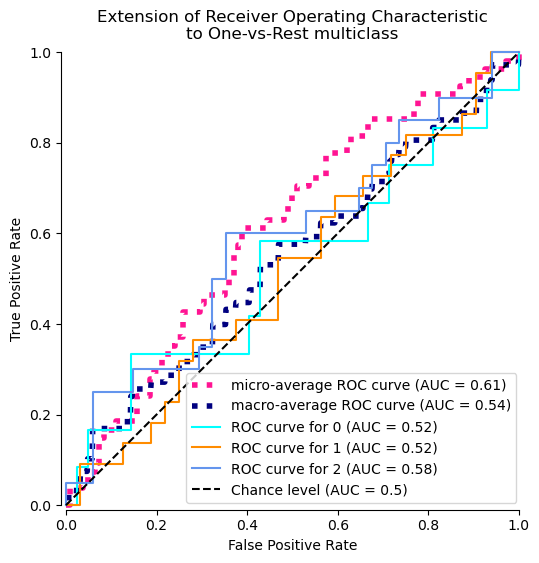

In [809]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_2v3v4[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
        despine=True,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)


In [810]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_2v3v4), 2))
print(pair_list)

[(0, 1), (0, 2), (1, 2)]


Macro-averaged One-vs-One ROC AUC score:
0.54


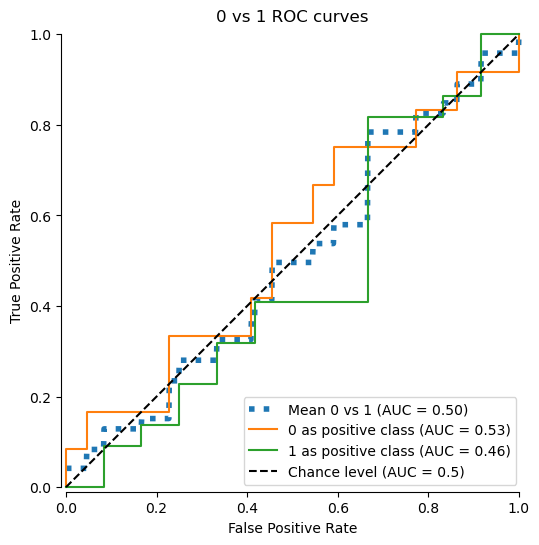

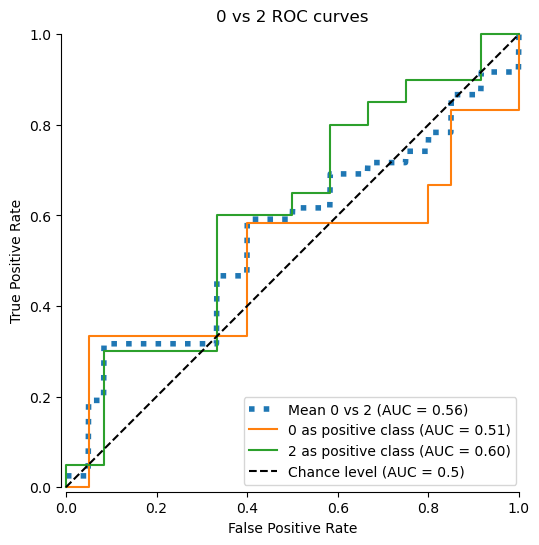

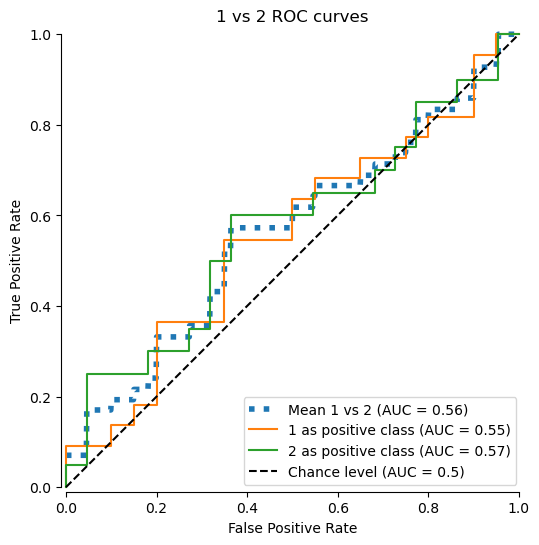

In [811]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test_2v3v4 == label_a
    b_mask = y_test_2v3v4 == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score_2v3v4[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score_2v3v4[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score_2v3v4[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score_2v3v4[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
        despine=True,
    )
    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{target_names[idx_a]} vs {label_b} ROC curves",
    )

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [812]:
macro_roc_auc_ovo = roc_auc_score(
    y_test_2v3v4,
    y_score_2v3v4,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.54


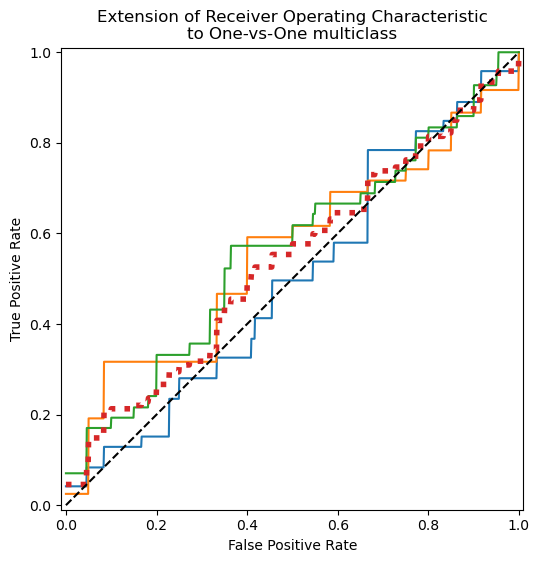

In [813]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    ax.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

ax.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-One multiclass",
    aspect="equal",
    xlim=(-0.01, 1.01),
    ylim=(-0.01, 1.01),
)

# 2s vs 4s vs 5s

# 2s vs 3s vs 5s

# 3s vs 4s vs 5s

# 2s vs 3s vs 4s vs 5s

In [847]:
grouped_lagged_added_stats_ri_2 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==2]

In [848]:
grouped_lagged_added_stats_ri_2['Binary']=0

In [849]:
grouped_lagged_added_stats_ri_3 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==3]

In [850]:
grouped_lagged_added_stats_ri_3['Binary']=1

In [851]:
grouped_lagged_added_stats_ri_4 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==4]

In [852]:
grouped_lagged_added_stats_ri_4['Binary']=2

In [853]:
grouped_lagged_added_stats_ri_5 = grouped_lagged_added_stats_ri.iloc[:,:][grouped_lagged_added_stats_ri['Choice Output']==5]

In [854]:
grouped_lagged_added_stats_ri_5['Binary']=3

In [856]:
grouped_lagged_binary2v3v4v5 = pd.concat([grouped_lagged_added_stats_ri_2, grouped_lagged_added_stats_ri_3, grouped_lagged_added_stats_ri_4, grouped_lagged_added_stats_ri_5])

In [857]:
grouped_lagged_binary2v3v4v5_ri = grouped_lagged_binary2v3v4v5.reset_index(drop=True)

In [861]:
x_main_2v3v4v5= grouped_lagged_binary2v3v4v5_ri.drop(columns = ['Choice Output', 'Duration', 'Exit Latency', 
        'Nose Max Distance', 'Nose Time to Max Dist', 'Tail Base Max Distance', 'Tail Base Time to Max Dist', 'Entry Tortuosity', 'Exit Tortuosity',
        'Other Tortuosity', 'Arm Nose Movement', 'Arm Nose Velocity', 'Arm Tail Movement', 'Arm Tail Velocity',
       
        'lagged_1_lagged_1_cur_coeff',
       'lagged_2_lagged_1_cur_coeff', 'lagged_3_lagged_1_cur_coeff',
       'lagged_4_lagged_1_cur_coeff',
       'lagged_1_lagged_2_cur_coeff', 'lagged_2_lagged_2_cur_coeff',
       'lagged_3_lagged_2_cur_coeff', 'lagged_4_lagged_2_cur_coeff',
       'lagged_1_lagged_3_cur_coeff',
       'lagged_2_lagged_3_cur_coeff', 'lagged_3_lagged_3_cur_coeff',
       'lagged_4_lagged_3_cur_coeff', 
       'lagged_1_lagged_4_cur_coeff', 'lagged_2_lagged_4_cur_coeff',
       'lagged_3_lagged_4_cur_coeff', 'lagged_4_lagged_4_cur_coeff',
       
       
       'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop',
       'lagged_3_lagged_1_cur_coeff_time_prop',
       'lagged_4_lagged_1_cur_coeff_time_prop',
       
       'lagged_1_lagged_2_cur_coeff_time_prop',
       'lagged_2_lagged_2_cur_coeff_time_prop',
       'lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop',
       
       'lagged_1_lagged_3_cur_coeff_time_prop',
       'lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop',
       'lagged_4_lagged_3_cur_coeff_time_prop',
       
       'lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop',
       'lagged_3_lagged_4_cur_coeff_time_prop',
       'lagged_4_lagged_4_cur_coeff_time_prop',
                                                                                                             
                                                                                                             
        'lagged_1_lagged_1_cur_coeff_time_prop',
       'lagged_2_lagged_1_cur_coeff_time_prop','lagged_3_lagged_1_cur_coeff_time_prop','lagged_4_lagged_1_cur_coeff_time_prop',
       'lagged_1_lagged_2_cur_coeff_time_prop','lagged_2_lagged_2_cur_coeff_time_prop','lagged_3_lagged_2_cur_coeff_time_prop',
       'lagged_4_lagged_2_cur_coeff_time_prop','lagged_1_lagged_3_cur_coeff_time_prop','lagged_2_lagged_3_cur_coeff_time_prop',
       'lagged_3_lagged_3_cur_coeff_time_prop','lagged_4_lagged_3_cur_coeff_time_prop','lagged_1_lagged_4_cur_coeff_time_prop',
       'lagged_2_lagged_4_cur_coeff_time_prop','lagged_3_lagged_4_cur_coeff_time_prop','lagged_4_lagged_4_cur_coeff_time_prop', 
        'Turn', 'lagged_1_turn_ago', 'lagged_2_turn_ago', 'lagged_3_turn_ago', 'lagged_4_turn_ago', 
        '2_cur_arm_duration', '3_cur_arm_duration', '4_cur_arm_duration',
       '5_cur_arm_duration', 'mean_2_cur_arm_duration',
       'mean_3_cur_arm_duration', 'mean_4_cur_arm_duration',
       'mean_5_cur_arm_duration', '2_past_arm_duration', '3_past_arm_duration',
       '4_past_arm_duration', 'mean_2_past_arm_duration',
       'mean_3_past_arm_duration', 'mean_4_past_arm_duration',
       '2_past_mid_duration', '3_past_mid_duration', '4_past_mid_duration',
       '5_past_mid_duration', 'mean_2_past_mid_duration',
       'mean_3_past_mid_duration', 'mean_4_past_mid_duration',
       'mean_5_past_mid_duration', '2_past_exitmid_duration',
       '3_past_exitmid_duration', '4_past_exitmid_duration',
       '5_past_exitmid_duration', 'mean_2_past_exitmid_duration',
       'mean_3_past_exitmid_duration', 'mean_4_past_exitmid_duration',
       'mean_5_past_exitmid_duration', '2_past_midentry_duration',
       '3_past_midentry_duration', '4_past_midentry_duration',
       '5_past_midentry_duration', 'mean_2_past_midentry_duration',
       'mean_3_past_midentry_duration', 'mean_4_past_midentry_duration',
       'mean_5_past_midentry_duration', '2_past_exitmidentry_duration',
       '3_past_exitmidentry_duration', '4_past_exitmidentry_duration',
       '5_past_exitmidentry_duration', 'mean_2_past_exitmidentry_duration',
       'mean_3_past_exitmidentry_duration',
       'mean_4_past_exitmidentry_duration',
       'mean_5_past_exitmidentry_duration',
                                                                                                               
        'lagged_1_choice_ago', 'lagged_2_choice_ago', 'lagged_3_choice_ago',
       'lagged_4_choice_ago',
        'lagged_1_new_lagged_1_cur_coeff',
        'lagged_2_new_lagged_1_cur_coeff', 
        'lagged_3_new_lagged_1_cur_coeff','lagged_4_new_lagged_1_cur_coeff','lagged_1_new_lagged_2_cur_coeff', 'lagged_2_new_lagged_2_cur_coeff', 
        'lagged_3_new_lagged_2_cur_coeff', 'lagged_4_new_lagged_2_cur_coeff','lagged_1_new_lagged_3_cur_coeff','lagged_2_new_lagged_3_cur_coeff', 
        'lagged_3_new_lagged_3_cur_coeff','lagged_4_new_lagged_3_cur_coeff','lagged_1_new_lagged_4_cur_coeff', 'lagged_2_new_lagged_4_cur_coeff',
        'lagged_3_new_lagged_4_cur_coeff', 'lagged_4_new_lagged_4_cur_coeff','lagged_1_new_lagged_1_cur_coeff_time_prop',
       'lagged_2_new_lagged_1_cur_coeff_time_prop','lagged_3_new_lagged_1_cur_coeff_time_prop','lagged_4_new_lagged_1_cur_coeff_time_prop',
       'lagged_1_new_lagged_2_cur_coeff_time_prop','lagged_2_new_lagged_2_cur_coeff_time_prop','lagged_3_new_lagged_2_cur_coeff_time_prop',
       'lagged_4_new_lagged_2_cur_coeff_time_prop','lagged_1_new_lagged_3_cur_coeff_time_prop','lagged_2_new_lagged_3_cur_coeff_time_prop',
       'lagged_3_new_lagged_3_cur_coeff_time_prop','lagged_4_new_lagged_3_cur_coeff_time_prop','lagged_1_new_lagged_4_cur_coeff_time_prop',
       'lagged_2_new_lagged_4_cur_coeff_time_prop','lagged_3_new_lagged_4_cur_coeff_time_prop','lagged_4_new_lagged_4_cur_coeff_time_prop',
        'Exit Latency Nose Movement', 'Exit Latency Nose Velocity', 'Exit Latency Tail Movement', 'Exit Latency Tail Velocity',
        
        'lagged_4_mid_duration', 
       'lagged_4_mid_nose_mov', 'lagged_4_mid_nose_vel', 
       'lagged_4_mid_tail_mov', 'lagged_4_mid_tail_vel', 'lagged_4_mid_tortuosity',                                              

                                                            
        
        'Lagged 4 Cur Coeff', 
        'New Lagged 4 Cur Coeff',                                          
                                               
         'Lagged 4 Cur Coeff Time Proportional',
          'New Lagged 4 Cur Coeff Time Proportional',                                            
          'Binary',
       'Lagged 2 Cur Coeff',  'New Lagged 2 Cur Coeff', 'Lagged 2 Cur Coeff Time Proportional', 'New Lagged 2 Cur Coeff Time Proportional',                                            
       'Lagged 3 Cur Coeff','New Lagged 3 Cur Coeff','Lagged 3 Cur Coeff Time Proportional', 'New Lagged 3 Cur Coeff Time Proportional',                                                
          'Lagged 1 Cur Coeff','New Lagged 1 Cur Coeff','Lagged 1 Cur Coeff Time Proportional', 'New Lagged 1 Cur Coeff Time Proportional'                                                ])


# 'Lagged 3 Cur Coeff','New Lagged 3 Cur Coeff','Lagged 3 Cur Coeff Time Proportional', 'New Lagged 3 Cur Coeff Time Proportional',


In [862]:
x_main_2v3v4v5.columns[:100]

Index(['Middle Duration', 'lagged_1_mid_duration', 'lagged_2_mid_duration',
       'lagged_3_mid_duration', 'Middle Nose Movement',
       'lagged_1_mid_nose_mov', 'lagged_2_mid_nose_mov',
       'lagged_3_mid_nose_mov', 'Middle Nose Velocity',
       'lagged_1_mid_nose_vel', 'lagged_2_mid_nose_vel',
       'lagged_3_mid_nose_vel', 'Middle Tail Movement',
       'lagged_1_mid_tail_mov', 'lagged_2_mid_tail_mov',
       'lagged_3_mid_tail_mov', 'Middle Tail Velocity',
       'lagged_1_mid_tail_vel', 'lagged_2_mid_tail_vel',
       'lagged_3_mid_tail_vel', 'Middle Tortuosity', 'lagged_1_mid_tortuosity',
       'lagged_2_mid_tortuosity', 'lagged_3_mid_tortuosity', 'Current Coeff',
       'lagged_1_current_coeff', 'lagged_2_current_coeff',
       'lagged_3_current_coeff', 'lagged_4_current_coeff', 'New Current Coeff',
       'lagged_1_new_current_coeff', 'lagged_2_new_current_coeff',
       'lagged_3_new_current_coeff', 'lagged_4_new_current_coeff',
       'Current Coeff Time Proportional',

In [863]:
x_2v3v4v5 = x_main_2v3v4v5.values

In [864]:
y_2v3v4v5 = grouped_lagged_binary2v3v4v5_ri['Binary'].values

In [865]:
y_2v3v4v5

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [866]:
X_train_2v3v4v5, X_test_2v3v4v5, y_train_2v3v4v5, y_test_2v3v4v5 = train_test_split(x_2v3v4v5, y_2v3v4v5, test_size=0.2, stratify = y_2v3v4v5, random_state=3)

In [908]:
mod_2v3v4v5 =  GradientBoostingClassifier(n_estimators=10000, learning_rate = 0.015, validation_fraction=0.1, n_iter_no_change=500, max_depth = None, random_state=59)
mod_2v3v4v5.fit(X_train_2v3v4v5, y_train_2v3v4v5)
y_pred_2v3v4v5=mod_2v3v4v5.predict(X_test_2v3v4v5)

In [909]:
mod_2v3v4v5.n_estimators_

501

In [910]:
target_names = ['2', '3', '4', '5']

In [911]:
f1_sc_2v3v4v5 = f1_score(y_test_2v3v4v5, y_pred_2v3v4v5, average = 'weighted')
f1_sc_2v3v4v5

0.24715005389347497

In [912]:
p_sc_2v3v4v5 = precision_score(y_test_2v3v4v5, y_pred_2v3v4v5, average = 'weighted')
p_sc_2v3v4v5

0.2413690476190476

In [913]:
cf_matrix_2v3v4v5 = confusion_matrix(y_test_2v3v4v5, y_pred_2v3v4v5)
cf_matrix_2v3v4v5

array([[ 1,  5,  5,  1],
       [ 1, 11,  5,  5],
       [ 4,  9,  3,  4],
       [ 1,  5,  2,  2]], dtype=int64)

In [914]:
print(classification_report(y_test_2v3v4v5, y_pred_2v3v4v5, target_names=target_names))

              precision    recall  f1-score   support

           2       0.14      0.08      0.11        12
           3       0.37      0.50      0.42        22
           4       0.20      0.15      0.17        20
           5       0.17      0.20      0.18        10

    accuracy                           0.27        64
   macro avg       0.22      0.23      0.22        64
weighted avg       0.24      0.27      0.25        64



In [875]:
y_score_2v3v4v5 = mod_2v3v4v5.predict_proba(X_test_2v3v4v5)


In [876]:
label_binarizer = LabelBinarizer().fit(y_train_2v3v4v5)
y_onehot_test = label_binarizer.transform(y_test_2v3v4v5)
y_onehot_test.shape  # (n_samples, n_classes)

(64, 4)

In [877]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

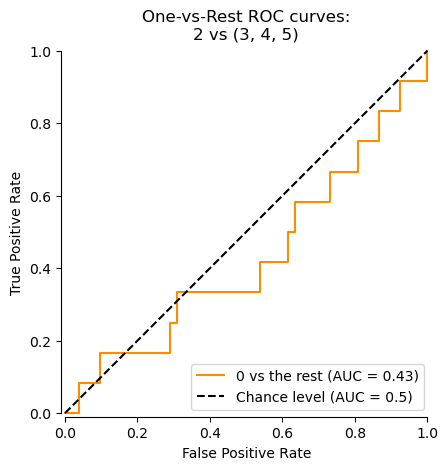

In [880]:
from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    y_score_2v3v4v5[:, class_id],
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="One-vs-Rest ROC curves:\n2 vs (3, 4, 5)",
)

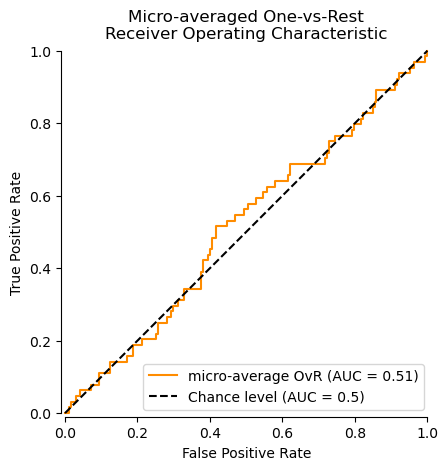

In [879]:
display = RocCurveDisplay.from_predictions(
    y_onehot_test.ravel(),
    y_score_2v3v4v5.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
    despine=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Micro-averaged One-vs-Rest\nReceiver Operating Characteristic",
)


In [881]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_test_2v3v4v5,
    y_score_2v3v4v5,
    multi_class="ovr",
    average="micro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{micro_roc_auc_ovr:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.51


In [882]:
from sklearn.metrics import auc, roc_curve

# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score_2v3v4v5.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")


Micro-averaged One-vs-Rest ROC AUC score:
0.51


In [883]:
n_classes = 3

In [884]:
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score_2v3v4v5[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.46


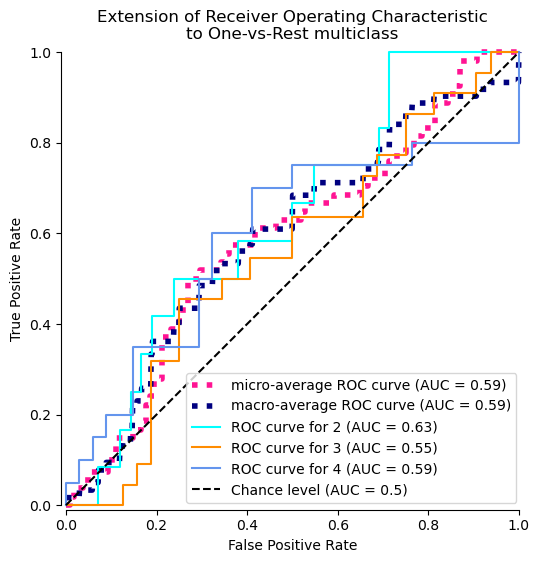

In [844]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_2v3v4v5[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax,
        plot_chance_level=(class_id == 2),
        despine=True,
    )

_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass",
)


In [885]:
from itertools import combinations

pair_list = list(combinations(np.unique(y_2v3v4v5), 2))
print(pair_list)

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]


Macro-averaged One-vs-One ROC AUC score:
0.49


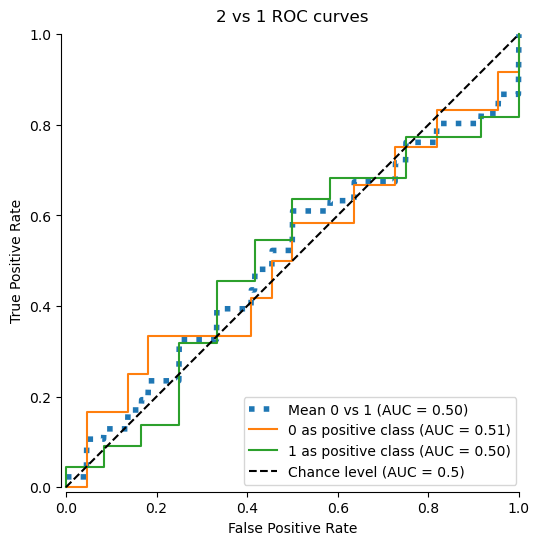

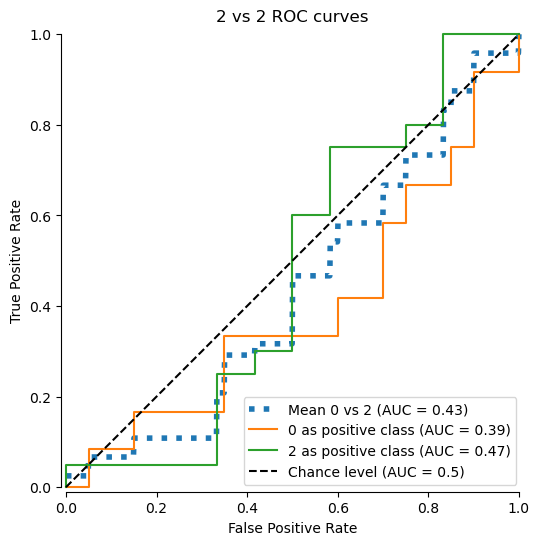

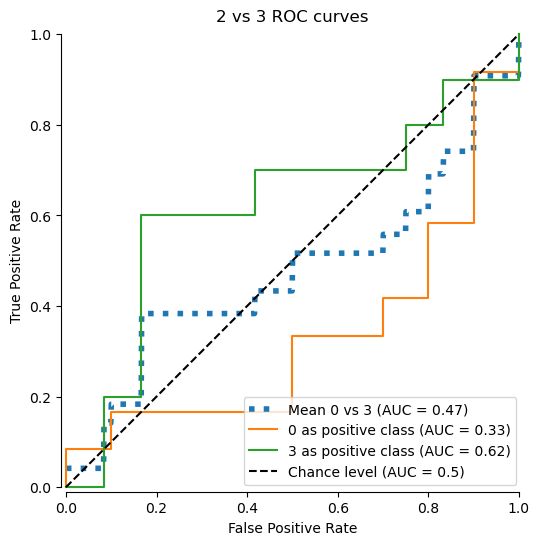

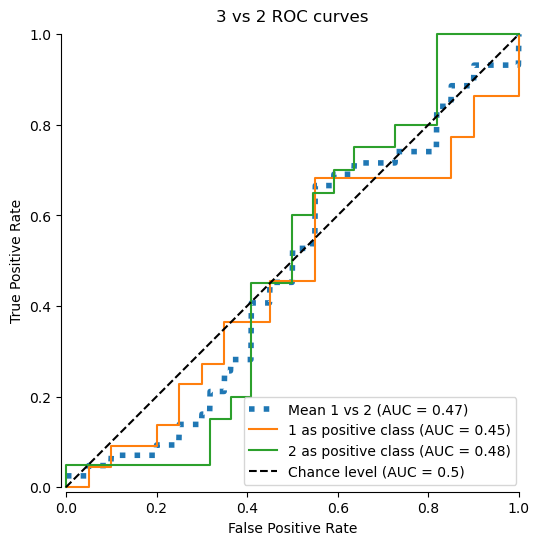

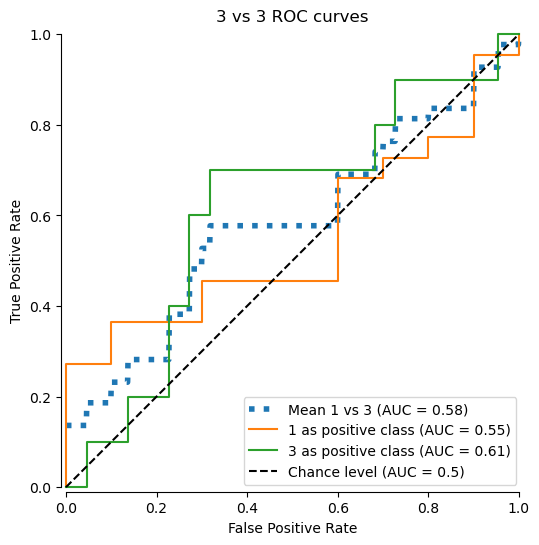

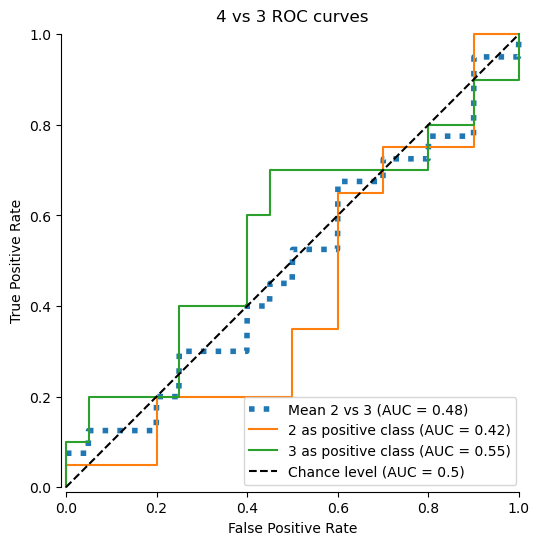

In [886]:
pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test_2v3v4v5 == label_a
    b_mask = y_test_2v3v4v5 == label_b
    ab_mask = np.logical_or(a_mask, b_mask)

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]

    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score_2v3v4v5[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score_2v3v4v5[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score_2v3v4v5[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score_2v3v4v5[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
        despine=True,
    )
    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{target_names[idx_a]} vs {label_b} ROC curves",
    )

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [887]:
macro_roc_auc_ovo = roc_auc_score(
    y_test_2v3v4v5,
    y_score_2v3v4v5,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.49


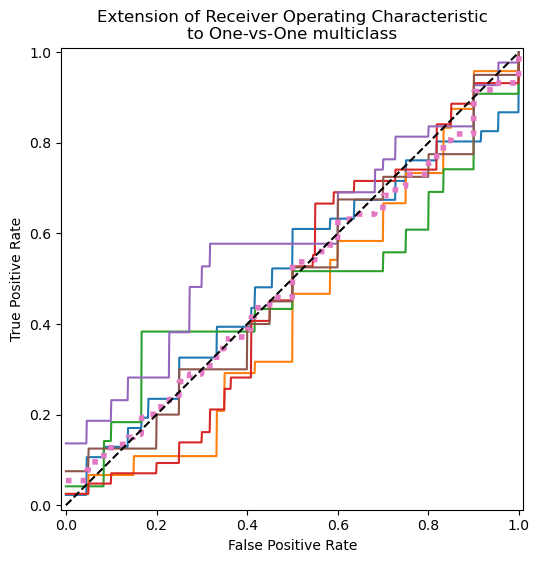

In [888]:
ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    ax.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

ax.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-One multiclass",
    aspect="equal",
    xlim=(-0.01, 1.01),
    ylim=(-0.01, 1.01),
)

In [915]:
X_t_2v3v4v5, X_test_2v3v4v5, y_t_2v3v4v5, y_test_2v3v4v5 = train_test_split(x_2v3v4v5, y_2v3v4v5, test_size=0.2, stratify = y_2v3v4v5, random_state=3)

In [916]:
X_train_2v3v4v5, X_cal_2v3v4v5, y_train_2v3v4v5, y_cal_2v3v4v5 = train_test_split(X_t_2v3v4v5, y_t_2v3v4v5, test_size=0.5, stratify = y_t_2v3v4v5, random_state=3)

In [917]:
mod_2v3v4v5 =  GradientBoostingClassifier(n_estimators=10000, learning_rate = 0.015, validation_fraction=0.1, n_iter_no_change=500, max_depth = None, random_state=59)
mod_2v3v4v5.fit(X_train_2v3v4v5, y_train_2v3v4v5)
#y_pred_2v3v4v5 =mod_2v3v4v5.predict(X_test_2v3v4v5)

GradientBoostingClassifier(learning_rate=0.015, max_depth=None,
                           n_estimators=10000, n_iter_no_change=500,
                           random_state=59)

In [918]:
mod_2v3v4v5.n_estimators_

501

In [919]:
cal_mod_2v3v4v5 = CalibratedClassifierCV(FrozenEstimator(mod_2v3v4v5), method = 'sigmoid')

In [927]:
cal_mod_2v3v4v5.fit(X_t_2v3v4v5,y_t_2v3v4v5)

CalibratedClassifierCV(estimator=FrozenEstimator(estimator=GradientBoostingClassifier(learning_rate=0.015,
                                                                                      max_depth=None,
                                                                                      n_estimators=10000,
                                                                                      n_iter_no_change=500,
                                                                                      random_state=59)))

In [928]:
y_pred_cal_2v3v4v5 =cal_mod_2v3v4v5.predict(X_test_2v3v4v5)

In [929]:
target_names = ['2', '3', '4', '5']

In [930]:
f1_sc_2v3v4v5 = f1_score(y_test_2v3v4v5, y_pred_cal_2v3v4v5, average = 'weighted')
f1_sc_2v3v4v5

0.2632460427953149

In [931]:
p_sc_2v3v4v5 = precision_score(y_test_2v3v4v5, y_pred_cal_2v3v4v5, average = 'weighted')
p_sc_2v3v4v5

0.26921218487394954

In [932]:
cf_matrix_2v3v4v5 = confusion_matrix(y_test_2v3v4v5, y_pred_cal_2v3v4v5)
cf_matrix_2v3v4v5

array([[1, 8, 1, 2],
       [3, 6, 7, 6],
       [1, 8, 7, 4],
       [2, 3, 2, 3]], dtype=int64)

In [933]:
print(classification_report(y_test_2v3v4v5, y_pred_cal_2v3v4v5, target_names=target_names))

              precision    recall  f1-score   support

           2       0.14      0.08      0.11        12
           3       0.24      0.27      0.26        22
           4       0.41      0.35      0.38        20
           5       0.20      0.30      0.24        10

    accuracy                           0.27        64
   macro avg       0.25      0.25      0.24        64
weighted avg       0.27      0.27      0.26        64

